In [600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random

In [44]:
df = pd.read_csv("casesBrazil.csv")

In [45]:
df.head()

,day,cases
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2


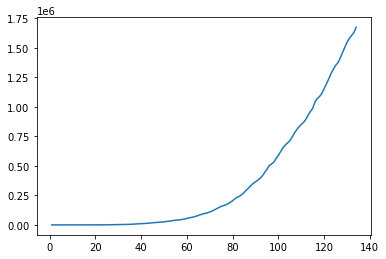

In [46]:
plt.plot(df['day'], df['cases'])
plt.show()

$ h(0) = \theta_0  +  \theta_1 x^1 ... \theta_3 x^3 $

In [47]:
# transformar dataset
#df["ones"] = np.ones(df.shape[0])

### Normalizations

In [48]:
# plt.hist(df["day"], bins = 10)
# plt.show()

df_norm = pd.DataFrame(df["day"].apply(lambda x: (x - min(df["day"])) / (max(df["day"])-min(df["day"]))))
df_padr = pd.DataFrame(df["day"].apply(lambda x: (x - df["day"].mean())/(np.std(df["day"])) ))

In [49]:
df_norm.head()

,day
0,0.000000
1,0.007519
2,0.015038
3,0.022556
4,0.030075


In [50]:
for i in range(2,11):
    norm_name = "norm_x" + str(i)
    padr_name = "padr_x" + str(i)
    df_norm[norm_name] = df_norm["day"]**i
    df_padr[padr_name] = df_padr["day"]**i

In [51]:
df_padr.head()

,day,padr_x2,padr_x3,padr_x4,padr_x5,padr_x6,padr_x7,padr_x8,padr_x9,padr_x10
0,-1.719173,2.955556,-5.081111,8.735309,-15.017506,25.817690,-44.385074,76.305617,-131.182551,225.525490
1,-1.693321,2.867335,-4.855318,8.221610,-13.921822,23.574110,-39.918529,67.594871,-114.459795,193.817141
2,-1.667468,2.780451,-4.636315,7.730908,-12.891046,21.495413,-35.842924,59.766946,-99.659498,166.179072
3,-1.641616,2.694904,-4.423998,7.262507,-11.922250,19.571759,-32.129318,52.744010,-86.585425,142.140041
4,-1.615764,2.610693,-4.218264,6.815720,-11.012595,17.793755,-28.750510,46.454040,-75.058766,121.277254


In [82]:
def costFunction(X, y, theta):
    h = X.dot(theta)
    m = X.shape[0]
    J = 1/(2*m) * (np.sum((h-y)**2))
    return J

In [83]:
def gradientDescent(X, y, theta, alpha, num_iter):
    m = X.shape[0]
    cost_array = []
    for i in range(num_iter):
        cost_array.append(costFunction(X,y,theta))
        h = X.dot(theta) - y
        theta = theta - ((alpha/m) * X.T.dot(h))
    return theta, cost_array

In [84]:
m,n = df_norm.shape
X_norm = np.array(())
X_norm = np.append(np.ones((m,1)),df_norm.values.reshape(m,n),axis = 1)
X_padr = np.array(())
X_padr = np.append(np.ones((m,1)),df_padr.values.reshape(m,n),axis = 1)
y = df["cases"].values.reshape(m,1)

In [85]:
theta_init = np.ones((X_norm.shape[1], 1))
alpha = 1
num_iter = 2000
theta_norm,cost_norm = gradientDescent(X_norm, y, theta_init, alpha, num_iter)

In [88]:
print(X_norm.shape, y.shape, theta_init.shape)

(134, 11) (134, 1) (11, 1)


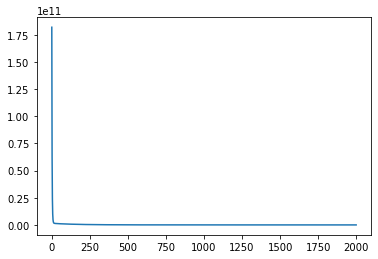

In [86]:
plt.plot(cost_norm)

(11, 1)


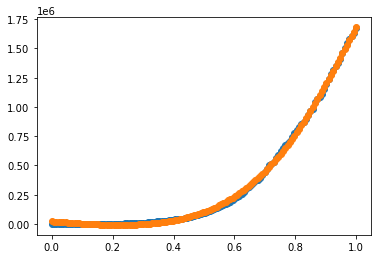

In [87]:
predict = X_norm.dot(theta_norm)
print(theta_norm.shape)
plt.scatter(df_norm["day"], df["cases"])
plt.scatter(df_norm["day"], predict)
plt.show()

### Curva exponencial

In [58]:
df.head()

,day,cases
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2


In [59]:
# apply log on y - cases
df["lny"] = df["cases"].apply(lambda x: np.log(x))

In [93]:
m,n = df_norm.shape
X = np.array(())
X = np.append(np.ones((m,1)),df_norm[["day"]].values,axis = 1)
y = df["lny"].values.reshape(m,1)

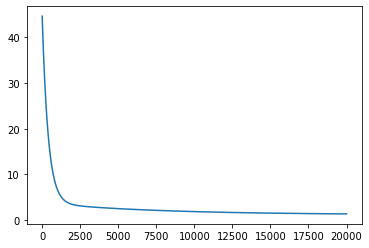

In [130]:
theta_init = np.ones((X.shape[1], 1))
alpha = 0.001
num_iter = 20000
theta_norm,cost_norm = gradientDescent(X, y, theta_init, alpha, num_iter)
plt.plot(cost_norm)
plt.show()

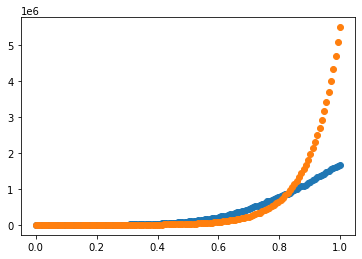

In [131]:
predict_Y = np.apply_along_axis(lambda x : np.exp(x), 0,X.dot(theta_norm))
plt.scatter(df_norm["day"], df["cases"])
plt.scatter(df_norm["day"], predict_Y)
plt.show()

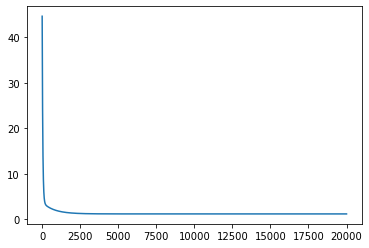

In [125]:
plt.plot(cost_norm)

### equation normalization funny

In [134]:
theta_norm = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y))

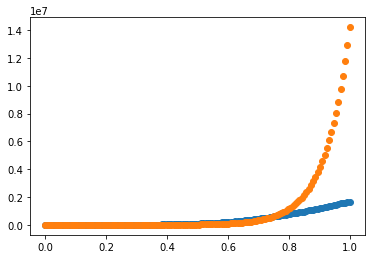

In [135]:
predict_Y = np.apply_along_axis(lambda x : np.exp(x), 0,X.dot(theta_norm))
plt.scatter(df_norm["day"], df["cases"])
plt.scatter(df_norm["day"], predict_Y)
plt.show()

# Parte 2 


In [180]:
df = pd.read_csv("imageMNIST.csv", header=None, low_memory=False)

In [181]:
df_y = pd.read_csv("labelMNIST.csv", header=None)

In [198]:
df_y

,0
0,10
1,10
2,10
3,10
4,10
...,...
4995,9
4996,9
4997,9
4998,9


In [183]:
def change_type(x):
    if(isinstance(x, int)):
        return float(x)
    elif(isinstance(x, str)):
        return float(x.replace(",", "."))

In [190]:
df = df.applymap(change_type)

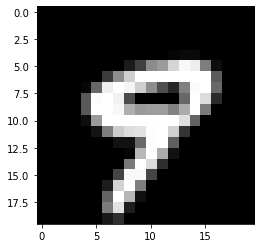

In [207]:
img = df.loc[4998].values.reshape(20,20).T
plt.imshow(img, cmap = 'gray', vmin=0, vmax=1)

In [615]:
#sigmoide
def g(z):
    g = (1 + np.exp(-z))**(-1)
    return g

def h_theta(theta,x):
    h = g(x.dot(theta))
    return h

In [616]:
def costFunction_class(X, y, theta):
    h = h_theta(theta,X)
    m = X.shape[0]
    J = -1/m * (np.sum((y*np.log(h))+((1-y)*np.log(1-h))))
    return J

In [617]:
def gradientDescent_class(X, y, theta, alpha=0.01, num_iter=100):
    m = X.shape[0]
    cost_array = []
    for i in range(num_iter):
        cost_array.append(costFunction_class(X,y,theta))
        h = h_theta(theta,X)
        theta = theta - ((alpha/m) * X.T.dot(h-y))
    return theta, cost_array

In [618]:
df_encoded = pd.get_dummies(df_y[0], prefix='digit')

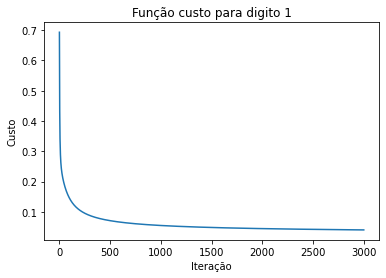

Acertos digito 1: 99.1%


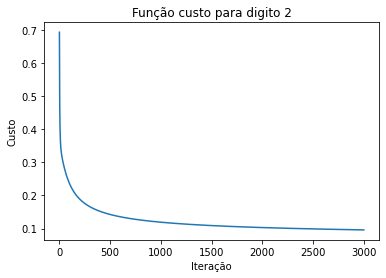

Acertos digito 2: 97.1%


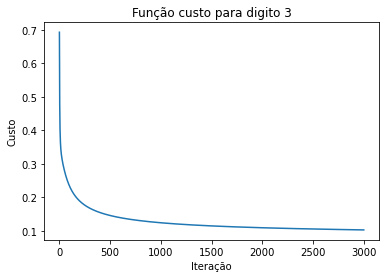

Acertos digito 3: 96.9%


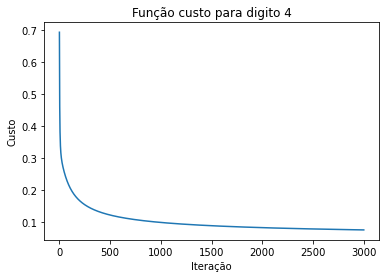

Acertos digito 4: 97.9%


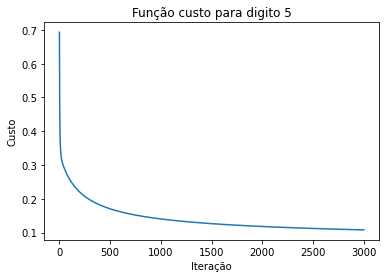

Acertos digito 5: 96.4%


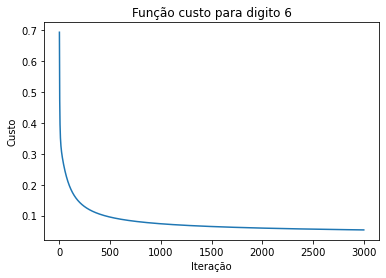

Acertos digito 6: 98.6%


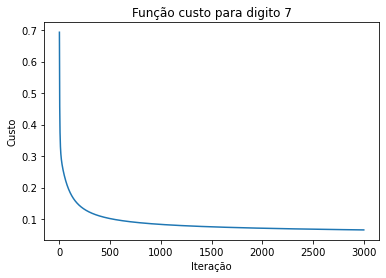

Acertos digito 7: 98.1%


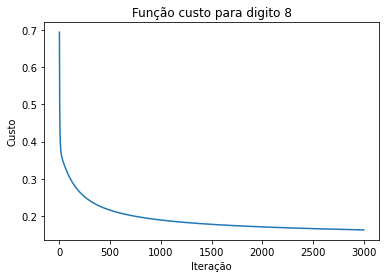

Acertos digito 8: 94.7%


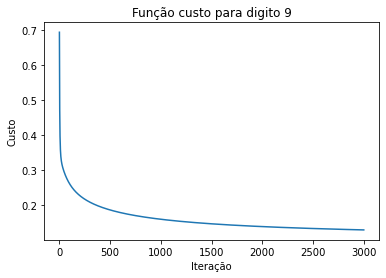

Acertos digito 9: 96.0%


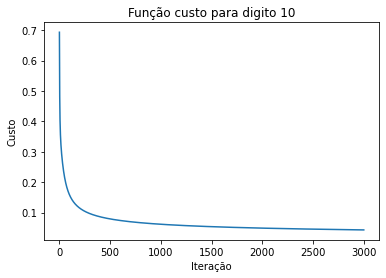

Acertos digito 10: 99.0%


In [619]:
predict_list=[]
precision = []

theta_list = []

theta_init = np.ones((n,1))
alpha = 0.04
num_iter = 3000

X = df.values
m,n = X.shape

for digit in range(1,11):
    y = df_encoded["digit_" + str(digit)].values.reshape(m,1)
    
    theta_init = np.zeros((n,1))
    theta, cost_array = gradientDescent_class(X, y, theta_init, alpha, num_iter)
    
    theta_list.append(theta)
    predict = h_theta(theta, X)
    predict_list.append(predict)
    
    p = (1 - (np.sum((np.logical_xor(np.round(predict), y)))/m))
    precision.append(p)
                   
    plt.plot(cost_array)
    plt.title('Função custo para digito {}'.format(digit))
    plt.xlabel("Iteração")
    plt.ylabel("Custo")
    plt.show()
                   
    print ("Acertos digito {}: {:.1f}%".format(digit, 100*p))

In [620]:
predictions = (np.argmax(np.array(predict_list).reshape(10,m), axis =0) + 1)
is_correct = predictions == df_y[0].values
print("Porcentagem de acerto = {:.1f}%".format(sum(is_correct) * 100 / m))

Porcentagem de acerto = 89.8%


In [621]:
erros = [i for i, x in enumerate(is_correct) if not x]

Erro número 164
V:3
F:5


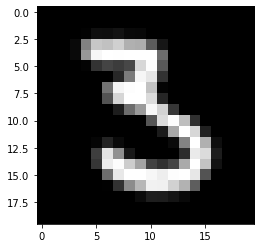

Erro número 235
V:5
F:2


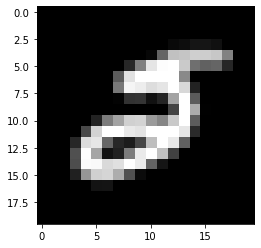

Erro número 81
V:2
F:8


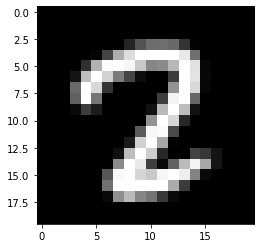

Erro número 190
V:4
F:9


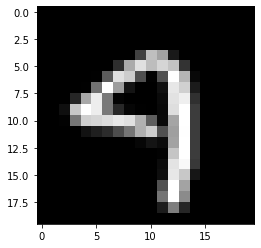

Erro número 157
V:3
F:2


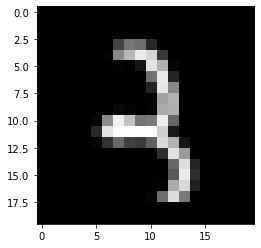

Erro número 199
V:4
F:9


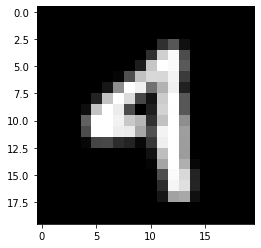

Erro número 381
V:7
F:1


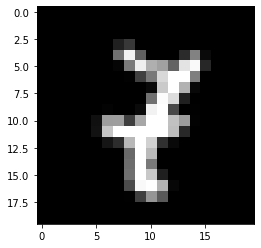

Erro número 274
V:5
F:2


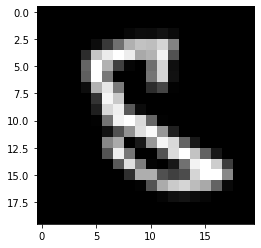

Erro número 124
V:3
F:9


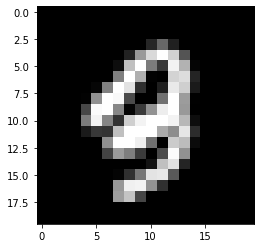

Erro número 447
V:8
F:2


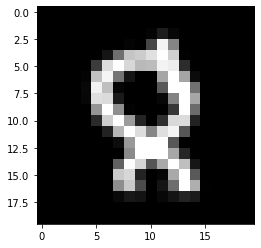

In [623]:
randrang = [ random.randrange(0, len(erros)) for i in range(10)]
for i in randrang:
    print("Erro número {}".format(i))
    img = df.loc[erros[i]].values.reshape(20,20).T
    print("V:{}\nF:{}".format(df_y.iloc[erros[i], 0], predictions[erros[i]]))
    plt.imshow(img, cmap = 'gray', vmin=0, vmax=1)
    plt.show()
    

In [606]:
random.randrange(0, 10)

3

In [591]:
df_y

,0
0,10
1,10
2,10
3,10
4,10
...,...
4995,9
4996,9
4997,9
4998,9


In [563]:
(np.argmax(np.array(predict_list), axis =0) + 1).shape

(5000, 1)

In [518]:
b = [[1,2,3],[4,3,2]]

In [519]:
np.argmax(b, axis=0)

array([1, 1, 0])

In [520]:
predictions[:, :2]

array([[[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]],

       [[0.95050555],
        [0.99802031]]])

In [509]:
predict_list

[array([[3.32145430e-04],
        [2.65272339e-03],
        [5.74783914e-08],
        ...,
        [6.26436842e-03],
        [2.97126332e-06],
        [2.39764448e-01]]),
 array([[3.32145430e-04],
        [2.65272339e-03],
        [5.74783914e-08],
        ...,
        [6.26436842e-03],
        [2.97126332e-06],
        [2.39764448e-01]]),
 array([[3.32145430e-04],
        [2.65272339e-03],
        [5.74783914e-08],
        ...,
        [6.26436842e-03],
        [2.97126332e-06],
        [2.39764448e-01]]),
 array([[3.32145430e-04],
        [2.65272339e-03],
        [5.74783914e-08],
        ...,
        [6.26436842e-03],
        [2.97126332e-06],
        [2.39764448e-01]]),
 array([[3.32145430e-04],
        [2.65272339e-03],
        [5.74783914e-08],
        ...,
        [6.26436842e-03],
        [2.97126332e-06],
        [2.39764448e-01]]),
 array([[3.32145430e-04],
        [2.65272339e-03],
        [5.74783914e-08],
        ...,
        [6.26436842e-03],
        [2.97126332e-06],
  

In [409]:
d = (np.logical_xor(np.round(predict), y)).reshape((5000,))
for i in range(0,m):
    if(d[i] == True and np.round(predict).reshape((5000,))[i]==1):
        print(d[i], np.round(predict).reshape((5000,))[i], y.reshape((5000,))[i])

True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0
True 1.0 0

In [398]:
d.reshape((5000,))

array([1., 1., 1., ..., 0., 0., 0.])

array([[1],
       [4],
       [1]])

In [404]:
a = (theta.dot(x[0]) - y[0]) * x[0][0]
b = (theta.dot(x[1]) - y[1]) * x[1][0]
c = (theta.dot(x[0]) - y[0]) * x[0][1]
d = (theta.dot(x[1]) - y[1]) * x[1][1]
theta[0] = theta[0] - (0.5/2) * (a+b)
theta[1] = theta[1] - (0.5/2) * (c+d)

print(theta)

[-1.5 -3.5]


In [405]:
x[0]

array([1., 3.])

In [406]:
theta.dot(x)

array([ -8.5, -18.5])

In [407]:
x.dot(theta)

array([-12., -17.])

In [408]:
np.dot(x[0],theta)

-12.0

In [409]:
np.dot(x,new_theta)

array([-12., -17.])

In [410]:
theta = theta - ((alpha/m) * X.T.dot(pred - y))

NameError: name 'm' is not defined

In [ ]:
new_theta.dot(x)

In [ ]:
np.dot(new_theta, x)

In [ ]:
x = np.array([[1,3],[2,4]], dtype=float)
y = np.array([5,6],dtype=float)
theta = np.array([1,2],dtype=float)
alpha = 0.5

y.reshape(len(y),1)
theta.reshape(len(theta),1)

new_theta,cost_array = gradientDescent(x,y,theta,alpha,1)

print(new_theta)